# MVE550 Assignment 3 

**Mahdi Afarideh, Jan Marten Winkler, Fredrik Nyström**

![](process.png)

## a) Find the posterior for $\tilde P$. Compute the expectation 
*The transition matrix  $\tilde P$ of the embedded chain is unknown, and we will use data from Figure 1 to learn about it. Let $\tilde P_{1}, \tilde P_{2}, \tilde P_{4}$, and $\tilde P_{4}$ be the four rows of $\tilde P$. \
Find the posterior given the data in the figure: Express the posterior using parametric distributions with explicit parameters. Compute the expected value of this posterior distribution.*

For this task we just look at the embedded discrete chain.
We are given 20 observations $x_{0}, \dots, x_{20}$ in the state space $\{ 1,2,3,4 \}$. 
The following values $c_{ij}$ give the count of transition between 2 states $i,j$:

| $c_{ij}$ | **1** | **2** | **3** | **4** |
| -------- | ----- | ----- | ----- | ----- |
| **1**    | 0     | 2     | 0     | 5     |
| **2**    | 4     | 0     | 1     | 0     |
| **3**    | 0     | 0     | 0     | 1     |
| **4**    | 2     | 3     | 0     | 0     |

Using this the likelyhood can be formulated as: 
$$
\pi(x_{0}, \dots, x_{20} | \tilde P) = \pi(x_{0}) \prod_{r=1}^{20} \pi(x_{r} | x_{r-1}, \tilde P) = \pi(x_{0}) \prod_{r=1}^{20} \tilde P_{x_{r-1}, x_{r}} = \pi(x_{0}) \prod_{i=k}^4 \prod_{j=1}^4 (P_{ij})^{c_{ij}}
$$

For the rows of $\tilde P$, we are given the priors: 
$$
\begin{array}{l l l}{{\displaystyle\tilde{P}_{1}}}&{{\sim}}&{{\mathrm{Dirichlet}(0,1,1,1)}}\\ {{\tilde{P}_{2}}}&{{\sim}}&{{\mathrm{Dirichlet}(1,0,1,1)}}\\ {{\displaystyle\tilde{P}_{3}}}&{{\sim}}&{{\mathrm{Dirichlet}(1,1,0,1)}}\\ {{\displaystyle\tilde{P}_{4}}}&{{\sim}}&{{\mathrm{Dirichlet}(1,1,1,0)}}\end{array}
$$
So the Prior for $\tilde P$ can be formulated as: 
$$
\pi(\tilde P) = \prod_{i=1}^4 \mathrm{Dirichlet}(\tilde P_{i}; \alpha_{i}) \propto \prod_{i=1}^4 \prod_{j=1}^4 (P_{ij})^{\alpha_{ij} - 1}
$$
For the posterior we see: 

\begin{align*}
\pi(\tilde P | x_{0}, \dots x_{20}) &\propto \pi(x_{0}, \dots, x_{20} | \tilde P) \pi(\tilde P) \\
&\propto \prod_{i=k}^4 \prod_{j=1}^4 (P_{ij})^{c_{ij}} \prod_{i=1}^4 \prod_{j=1}^4 (P_{ij})^{\alpha_{ij} - 1} \\
&\propto \prod_{i=1}^4 \prod_{j=1}^4 (P_{ij})^{c_{ij} + \alpha_{ij} - 1} 
\propto \prod_{i=1}^4 \mathrm{Dirichlet}( \tilde P_{i}; \alpha_{i} + c_{i})
\end{align*}

Thus the posterior is given by the distribution 
$$
\pi(\tilde P | x_{0}, \dots x_{20}) = \mathrm{Dirichlet}( \tilde P_{1}; 0, 3, 1, 6) \mathrm{Dirichlet}( \tilde P_{2}; 5, 0, 2, 1) \mathrm{Dirichlet}( \tilde P_{3}; 1,1,0,2) \mathrm{Dirichlet}( \tilde P_{4}; 3,4,1,0)
$$
The expectation for one entry of a Dirichlet Distribution is given by: 
$$
E[\tilde P_{ij}] = E[\mathrm{Dirichlet}( \tilde P_{i}; \alpha_{i})_{j}] = \frac{a_{ij}}{\sum_{k=1}^4 \alpha_{ik}}
$$

In [133]:
# alpha parameters for the prior distributions
alpha_prior <- matrix(
  c(0, 1, 1, 1,   # alpha1
    1, 0, 1, 1,   # alpha2
    1, 1, 0, 1,   # alpha3
    1, 1, 1, 0),  # alpha4
  nrow = 4, byrow = TRUE
)

transition_counts <- matrix(
  c(0, 2, 0, 5,   
    4, 0, 1, 0, 
    0, 0, 0, 1,  
    2, 3, 0, 0),
  nrow = 4, byrow = TRUE
)

# Calculate the alpha parameters for the posterior
alpha_matrix <- alpha_prior + transition_counts

# Function to compute Dirichlet expectation row wise
# returns a vector
dirichlet_expectation <- function(alpha_row) {
  total_alpha <- sum(alpha_row)
  return(alpha_row / total_alpha)
}

# Calculate the expectations for all rows
expectations <- t(apply(alpha_matrix, 1, dirichlet_expectation))

# Print the expectations
print(expectations)


      [,1] [,2]  [,3]  [,4]
[1,] 0.000 0.30 0.100 0.600
[2,] 0.625 0.00 0.250 0.125
[3,] 0.250 0.25 0.000 0.500
[4,] 0.375 0.50 0.125 0.000


In [134]:
# Calculate holding times for each state
time_s1 <- c(1, 1, 1, 3.4, 1.5, 1.2, 2.5)
sum_time_s1 <- sum(time_s1)
len_time_s1 <- length(time_s1)

time_s2 <- c(1, 1.1, 1.8, 1, 1.8)
sum_time_s2 <- sum(time_s2)
len_time_s2 <- length(time_s2)

time_s3 <- c(1.1)
sum_time_s3 <- sum(time_s3)
len_time_s3 <- length(time_s3)

time_s4 <- c(1.4, 1, 1.8, 1.5, 1.7, 2.2)
sum_time_s4 <- sum(time_s4)
len_time_s4 <- length(time_s4)

print(sum_time_s1 + sum_time_s2 + sum_time_s3 + sum_time_s4)

[1] 29


## b) Obtain a posterior distribution for q. Compute the expected value. 
*Now assume that the process is a homogeneous Markov chain. Let $q = (q_{1}, q_{2}, q_{3},q_{4})$ be the vector of parameters for the Exponential distributions of the holding times at the four different states, respectively. Assume independent priors for each qi proportional to $1/qi$. 
Now use the data from the figure to obtain a posterior distribution for q. 
Express the posterior using parametric distributions with explicit parameters. 
Compute the expected value of the posterior distribution.*

The parameters for the exponential distribution of the holding times are given by $q = (q_{1}, q_{2}, q_{3},q_{4})$. Let the observed holding times for a state be $x_{1}, \dots x_{n}$, the values are the following:

|     | $x_1$ | $x_{2}$ | $x_{3}$ | $x_{4}$ | $x_{5}$ | $x_{6}$ | $x_{7}$ |
| --- | ----- | ------- | ------- | ------- | ------- | ------- | ------- |
| 1   | 1     | 1       | 1       | 3.4     | 1.5     | 1.2     | 2.5     |
| 2   | 1     | 1.1     | 1.8     | 1       | 1.8     | -       | -       |
| 3   | 1.1   |         |         |         |         |         |         |
| 4   | 1.4   | 1       | 1.8     | 1.5     | 1.7     | 2.2     | -       |


The likelyhood for each state indepentently is thus given by the exponential distribution: 
$$
\pi(x_{1}, \dots x_{n} | q_{i}) = \prod_{i=1}^n \mathrm{Exponential}(x_{j} ; q_{i}) = q_{i}^n \exp\left( -q_{i} \sum_{j=1}^n x_{j} \right)
$$
The priors are given by independent $\pi(q_{i}) = \frac{1}{q_{i}}$. 
For the posteriors we thus get indepentently: 
$$
\pi(q_{i} | x_{1}, \dots x_{n}) \propto \pi(x_{1}, \dots x_{n} | q_{i}) \pi(q_{i}) = q_{i}^{n-1} \exp\left( -q_{i} \sum_{j=1}^n x_{j} \right) \propto \mathrm{Gamma}(q_{i}, n, \sum_{j=1}^n x_{j} )
$$
$$
\begin{align}
q_1 &\sim \text{Gamma}(7, 11.6) \\
q_2 &\sim \text{Gamma}(5, 6.7) \\  
q_3 &\sim \text{Gamma}(1, 1.1) \\ 
q_4 &\sim \text{Gamma}(6, 9.6) \\
\end{align}
$$
The expectation of a Gamma Distribution is: $E[X] = \frac{\alpha}{\beta}$, so we get the expected rates:

In [135]:
number_visited <- c(7, 5, 1, 6)
holding_times <- c(11.6, 6.7, 1.1, 9.6)

q <- number_visited / holding_times
q

[1] 0.6034483 0.7462687 0.9090909 0.6250000

## c) 
*Write R code which takes as input the transition matrix $\tilde P$ of a continuous-time discrete state-space Markov chain and a vector $q$ of parameters for the distributions of the holding times of the chain, and outputs the long-term  probability that the process will be in state 3. Apply the code to the expected values found in questions (a) and (b) and report the result.*

As we visit all states, we can assume the markov chain is irreducable. We want to find the limiting distribution $\pi$. For irreducable chains the unique limiting distribution is given by the stationary distribution, which we can find by solving $\pi Q = 0$:

In [136]:
stationary_distribution <- function(P, q) {
  Q0 <- P*matrix(q, 4, 4)
  Q  <- Q0 - diag(q)

  # find pQ=0
  Q2 <- Q
  Q2[,1] <- 1
  # Right-hand side: zeros for pQ=0, and 1 for sum=1
  result <- c(1, 0, 0, 0)%*%solve(Q2)     

  return(result)
}

dist <- stationary_distribution(expectations, q)
cat("The long term probability for state 3 is given by:", dist[3])

The long term probability for state 3 is given by: 0.09970986

## d)
*Use simulation in R and your results from questions (a), (b), and (c) to answer the following question: Taking into account the parameter uncertainty, what is the long-term probability that the process in the Figure is in state 3?* 

In [137]:
install.packages("LearnBayes")

Warning message:
"package 'LearnBayes' is in use and will not be installed"


In [138]:
library(LearnBayes)

# store the average distribution
dists <- c(0,0,0,0)
n <- 1000

# sample a matrix P given some alpha values from dirichlet
sample_P<- function(alpha_matrix){
  P <- apply(alpha_matrix, 1, function(alpha_row){
      rdirichlet(1, alpha_row)
  })
  return(P)
}

# sample the q vector from the gamma distribution
sample_q <-function(number_visited,holding_times){
  q1 <- rgamma(1,number_visited[1], holding_times[1])
  q2 <- rgamma(1,number_visited[2], holding_times[2])
  q3 <- rgamma(1,number_visited[3], holding_times[3])
  q4 <- rgamma(1,number_visited[4], holding_times[4])
  q <- c(q1, q2, q3, q4)
  return(q)
}

for (i in 1:n){
  # sample P and q
  P <- sample_P(alpha_matrix)
  q <- sample_q(number_visited,holding_times)
  sim <- stationary_distribution(P, q)
  dists <-  dists + sim
}

# calculate the mean
dist <- dists/n

cat("The long term probability for state 3 is given by:", dist[3])


The long term probability for state 3 is given by: 0.2959284

## e) 
*Implement simulation of a realization of the process over 30 steps. (You may if you like re-use and adapt code from Lecture 12). You should implement two versions of simulation*
- *Draw values for  $\tilde P$ and $q$ from their posteriors, and use these values when simulating all the steps of the process.* 
- *Simulate only one transition or one duration at the time, and update posteriors with simulated values before going to the next step.*



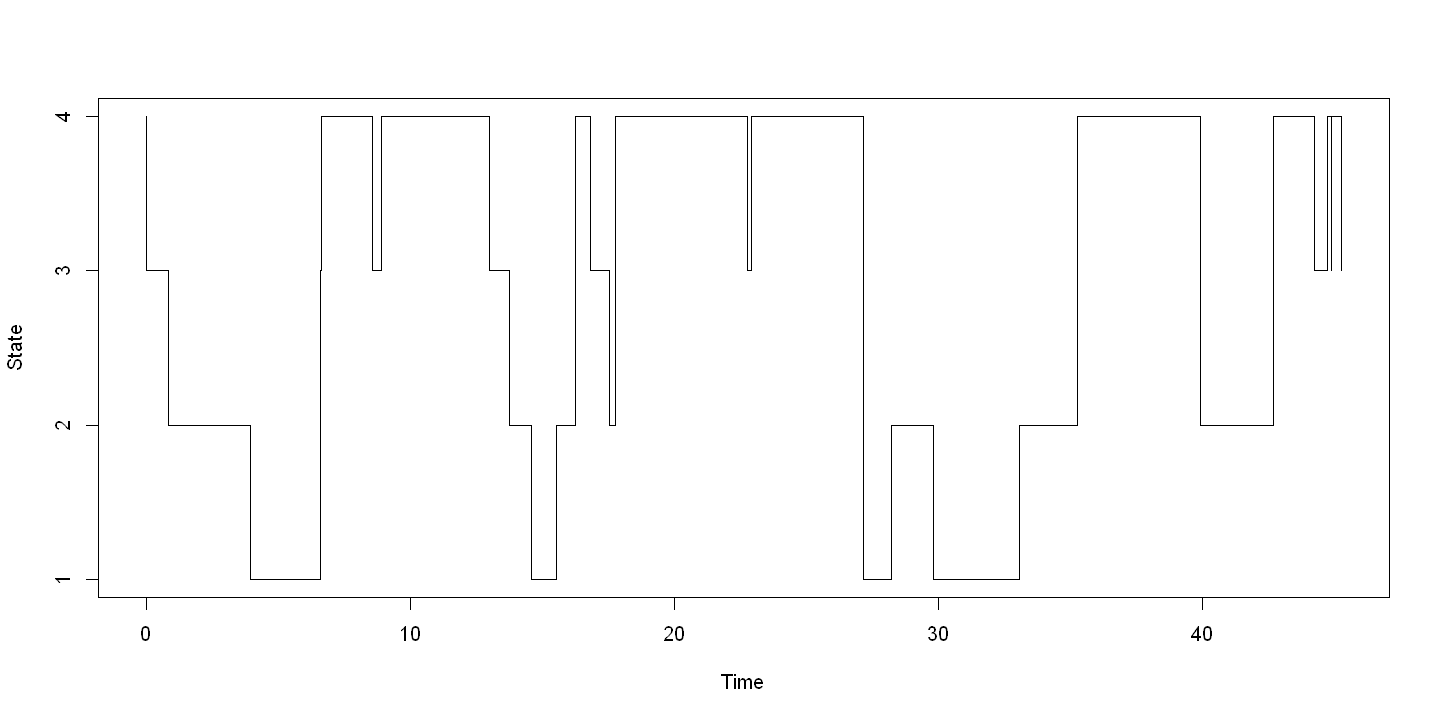

In [139]:
# sample posteriors of P and q once using the initition data
P <- sample_P(alpha_matrix)
q <- sample_q(number_visited,holding_times) 
N <- 30
states <- rep(0, N)
states[1] <- 4

for (i in 2:N) 
  # sample a next state i according to probabilities P
  states[i] <- sample(1:4, 1, prob = P[states[i-1],])

# sample the holding time from q:
waits <- rexp(N, q[states])
times <- cumsum(waits)

options(repr.plot.width=12, repr.plot.height=6)
# To plot the simulation as a step function:  
par(bg = "white")  
x <- y <- rep(0, 2 * N)
y[2 * (1:N) - 1] <- states
y[2 * (1:N)] <- states
x[2 * (1:N)] <- times
x[2 * (2:N) - 1] <- times[-N]
plot(x, y, type = "l", xlab = "Time", ylab = "State", yaxt = "n")
axis(2, at = 1:4)


     [,1] [,2] [,3] [,4]
[1,]    0    1    1    6
[2,]    5    0    5    1
[3,]    1    1    0    2
[4,]    3    4    1    0
[1] 44.000641 23.326808  7.699795 25.302404


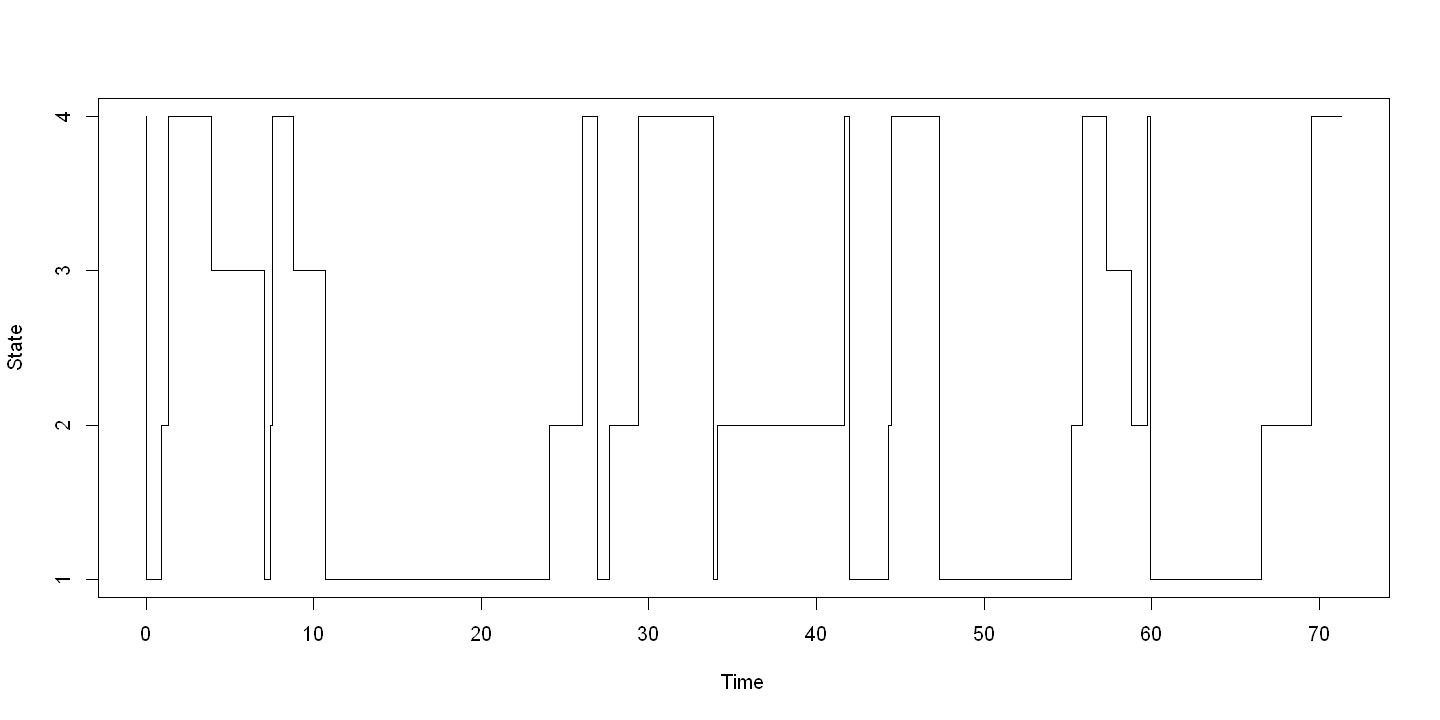

In [140]:
N <- 30
states <- rep(0, N)
states[1] <- 4

for(i in 2:N) {
  # sample P using the updated alpha
  P <- sample_P(alpha_matrix)
  # sample a next state i according to probabilities P
  states[i] <- sample(1:4, 1, prob = P[states[i-1],])
  # Update the count for the transition
  alpha_matrix[states[i]-1, states[i]] <- alpha_matrix[2, states[i]] + 1

  # sample the posterior of q using updated parameters
  q <- sample_q(number_visited,holding_times)
  # increase the count for the state
  number_visited[states[i]] <- number_visited[states[i]]+1
  # sample the holding time from q:
  wait <- rexp(1, q[states[i]])
  # store the new total holding time:
  holding_times[states[i]] <- holding_times[states[i]]+wait
  waits[i]<-wait
}

# To plot the simulation as a step function: 
times <- cumsum(waits)
par(bg = "white")  # Adjust the width and height
x <- y <- rep(0, 2 * N)
y[2 * (1:N) - 1] <- states
y[2 * (1:N)] <- states
x[2 * (1:N)] <- times
x[2 * (2:N) - 1] <- times[-N]
plot(x, y, type = "l", xlab = "Time", ylab = "State", yaxt = "n")
axis(2, at = 1:4)

print(alpha_matrix)
print(holding_times)


## f)
*Find the formula for the probability that $k$ independent random variables with $\mathrm{Exponential}(λ)$ distributions are all at least $1$. Then, compute analytically the expectation of this formula when $\lambda$ has a $\mathrm{Gamma}(α, β)$ distribution.*

#### Probability that $k$ independent $\text{Exponential}(\lambda)$ random variables are all at least 1

$$ P(X_i \geq 1) = 1 - P(X_i < 1) = 1 - F_{X_i}(1)$$

where $F_{X_i}(1)$ is the CDF. The CDF for the $Exponential(\lambda)$ is:

$F_{X_i}(x) = 1 - e^{-\lambda x}$

so $P(X_i \geq 1) = 1 - (1-e^{-\lambda*1}) = e^{-\lambda}$

Since the random variables are independent the joined probability is the product of individual probabilities.

$$ P(X_1 \geq 1, X_2 \geq 1, ... X_k \geq 1) = \prod_{i=1}^k P(X_i \geq 1) = e^{-k\lambda}$$

$$\mathbb{E}[e^{-k\lambda}] \quad \text{when } \lambda \sim \text{Gamma}(\alpha, \beta)$$


Since the $k$ random variables are independent, the joint probability is:

$$
P(X_1 \geq 1, X_2 \geq 1, \dots, X_k \geq 1) = \prod_{i=1}^k P(X_i \geq 1) = (e^{-\lambda})^k = e^{-k\lambda}
$$

#### Expectation $E[e^{-k\lambda}]$ when $\lambda \sim \text{Gamma}(\alpha, \beta)$

For $\lambda \sim \text{Gamma}(\alpha, \beta)$ the PDF is:

$$ f_\lambda(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}, \quad \lambda > 0$$

then we get

$$ E[e^{-k\lambda}] = \int_{0}^{\infty} e^{-k\lambda} f_\lambda(\lambda) \, d\lambda = \frac{\beta^\alpha}{\Gamma(\alpha)} \int_{0}^{\infty} \lambda^{\alpha - 1} e^{-(k+\beta) \lambda} \, d\lambda$$
Since the term inside of the integral is proportional to the Gamma density this integrates to the normalizing constant:
$$\int_{0}^{\infty} \lambda^{\alpha - 1} e^{-(k+\beta) \lambda} \, d\lambda=
 \frac{\Gamma(\alpha)}{(k+\beta)^\alpha} \int_{0}^{\infty}\frac{(k+\beta)^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-(k+\beta) \lambda} \, d\lambda  = \frac{\Gamma(\alpha)}{(k+\beta)^\alpha} \cdot 1
$$

Leading to 

$$ E[e^{-k\lambda}] = \frac{\beta^\alpha}{\Gamma(\alpha)} \cdot \frac{\Gamma(\alpha)}{(k+\beta)^\alpha} = \left(\frac{\beta}{k+\beta}\right)^\alpha $$

## g) 
*Note that in the Figure, all visits to state 1 are at least 1 long. Use your
result in (f) to compute the probability, under our assumptions so far, that
this happens. If this were a real, applied setting, what kind of conclusions
might be drawn from this computation?*

In [141]:
# Expectation
k <- 7
alpha <- 7
beta <- 11.6

prob <- (beta/(k + beta))^alpha
prob

[1] 0.03669571

In [142]:
# Visiting state 1 seven times in the figure including the uncertainty of the rate
k <- 7
alpha <- 7
beta <- 11.6
n_samples = 100000
lambdas <- rgamma(n_samples, alpha, beta)

probs <- exp(-k*lambdas)
mean(probs)

[1] 0.03666852

Since the probability is around 3.7% its quite unlikely that we will stay in state 1 for equal or longer than 1 second, which is suprising because if we naivly look at the average staying time in state 1, it is bigger than one second.